![title](https://cityupload.io/2024/09/1-title_4fc84.png)

# Heart Attack Analysis & Prediction - Classification

![introduction](https://cityupload.io/2024/09/0-intro.png)

## Introduction

This classification project to detect heart attacks typically involves analyzing medical data to predict whether a person is at risk of experiencing a heart attack. The goal is to build a machine learning model that can classify patients into categories such as "at risk" or "not at risk" based on features like age, Sex, resting blood pressure,and other health indicators.

![libraries](https://cityupload.io/2024/09/2-lib.png)

## Importing Libraries

In [43]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, auc

# Cross-validation and hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# Warnings
import warnings
warnings.filterwarnings("ignore")


![data](https://cityupload.io/2024/09/loading-data.png)

## Loading Data

For more information about data [here](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data)

In [2]:
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
License(s): CC0-1.0
  0% 0.00/4.11k [00:00<?, ?B/s]
100% 4.11k/4.11k [00:00<00:00, 7.96MB/s]


In [3]:
!unzip heart-attack-analysis-prediction-dataset.zip

Archive:  heart-attack-analysis-prediction-dataset.zip
  inflating: heart.csv               
  inflating: o2Saturation.csv        


In [10]:
# Read data
df = pd.read_csv('heart.csv')

# first 10 rows of data
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


There are some Categorical columns existing in encoded form, such as 'sex'.

![Data Cleanong](https://cityupload.io/2024/09/4-cleaning.png)

## Data Cleaning

In this section i'll deal with:
* Null values.
* Ouliers.


In [7]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are no null values on data.

In [11]:
# Data Statistics
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Columns to explore
to_explore = [col for col in df.columns if col not in ['output']]

for column in to_explore:
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = len(outliers)

    # Create subplots: 1 row, 2 columns
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f'{column} - Boxplot', f'{column} - Distplot'))

    # Boxplot
    fig.add_trace(go.Box(
        y=df[column],
        name='Boxplot',
        boxmean='sd'
    ), row=1, col=1)

    # Distplot (Density Plot)
    fig.add_trace(go.Histogram(
        x=df[column],
        name='Distplot',
        histnorm='probability density',
        nbinsx=30,
        opacity=0.6,
        marker_color='skyblue'
    ), row=1, col=2)

    # Add annotations to Boxplot
    fig.add_annotation(
        x=1,  # Center of the boxplot
        y=df[column].max(),
        text=f'No Outliers: {outlier_count}',
        showarrow=False,
        arrowhead=2,
        ax=0,
        ay=-50,
        xref='x1',
        yref='y1'
    )

    # Update layout
    fig.update_layout(
        title=f'Interactive Plot for {column}',
        xaxis_title='Values',
        yaxis_title='Density',
        xaxis2_title='Values',
        yaxis2_title='Density',
        height=600,
        width=1000,
        showlegend=False
    )

    # Show plot
    fig.show()


All existion points out of the box plots are normal, and i don't see any required modification.

![Data Preprocessing](https://cityupload.io/2024/09/6-preprcessing.png)

## Data Preprocessing

In this section i'll perform:
* Exploring Correlation.
* Data Visualization.
* Splitting Data
* Data Scalling.



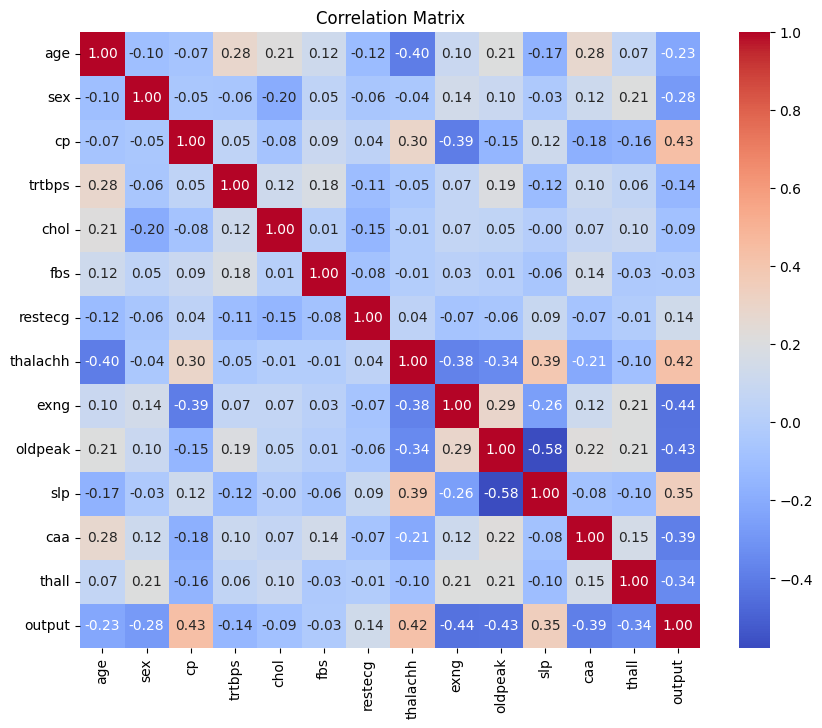

In [13]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

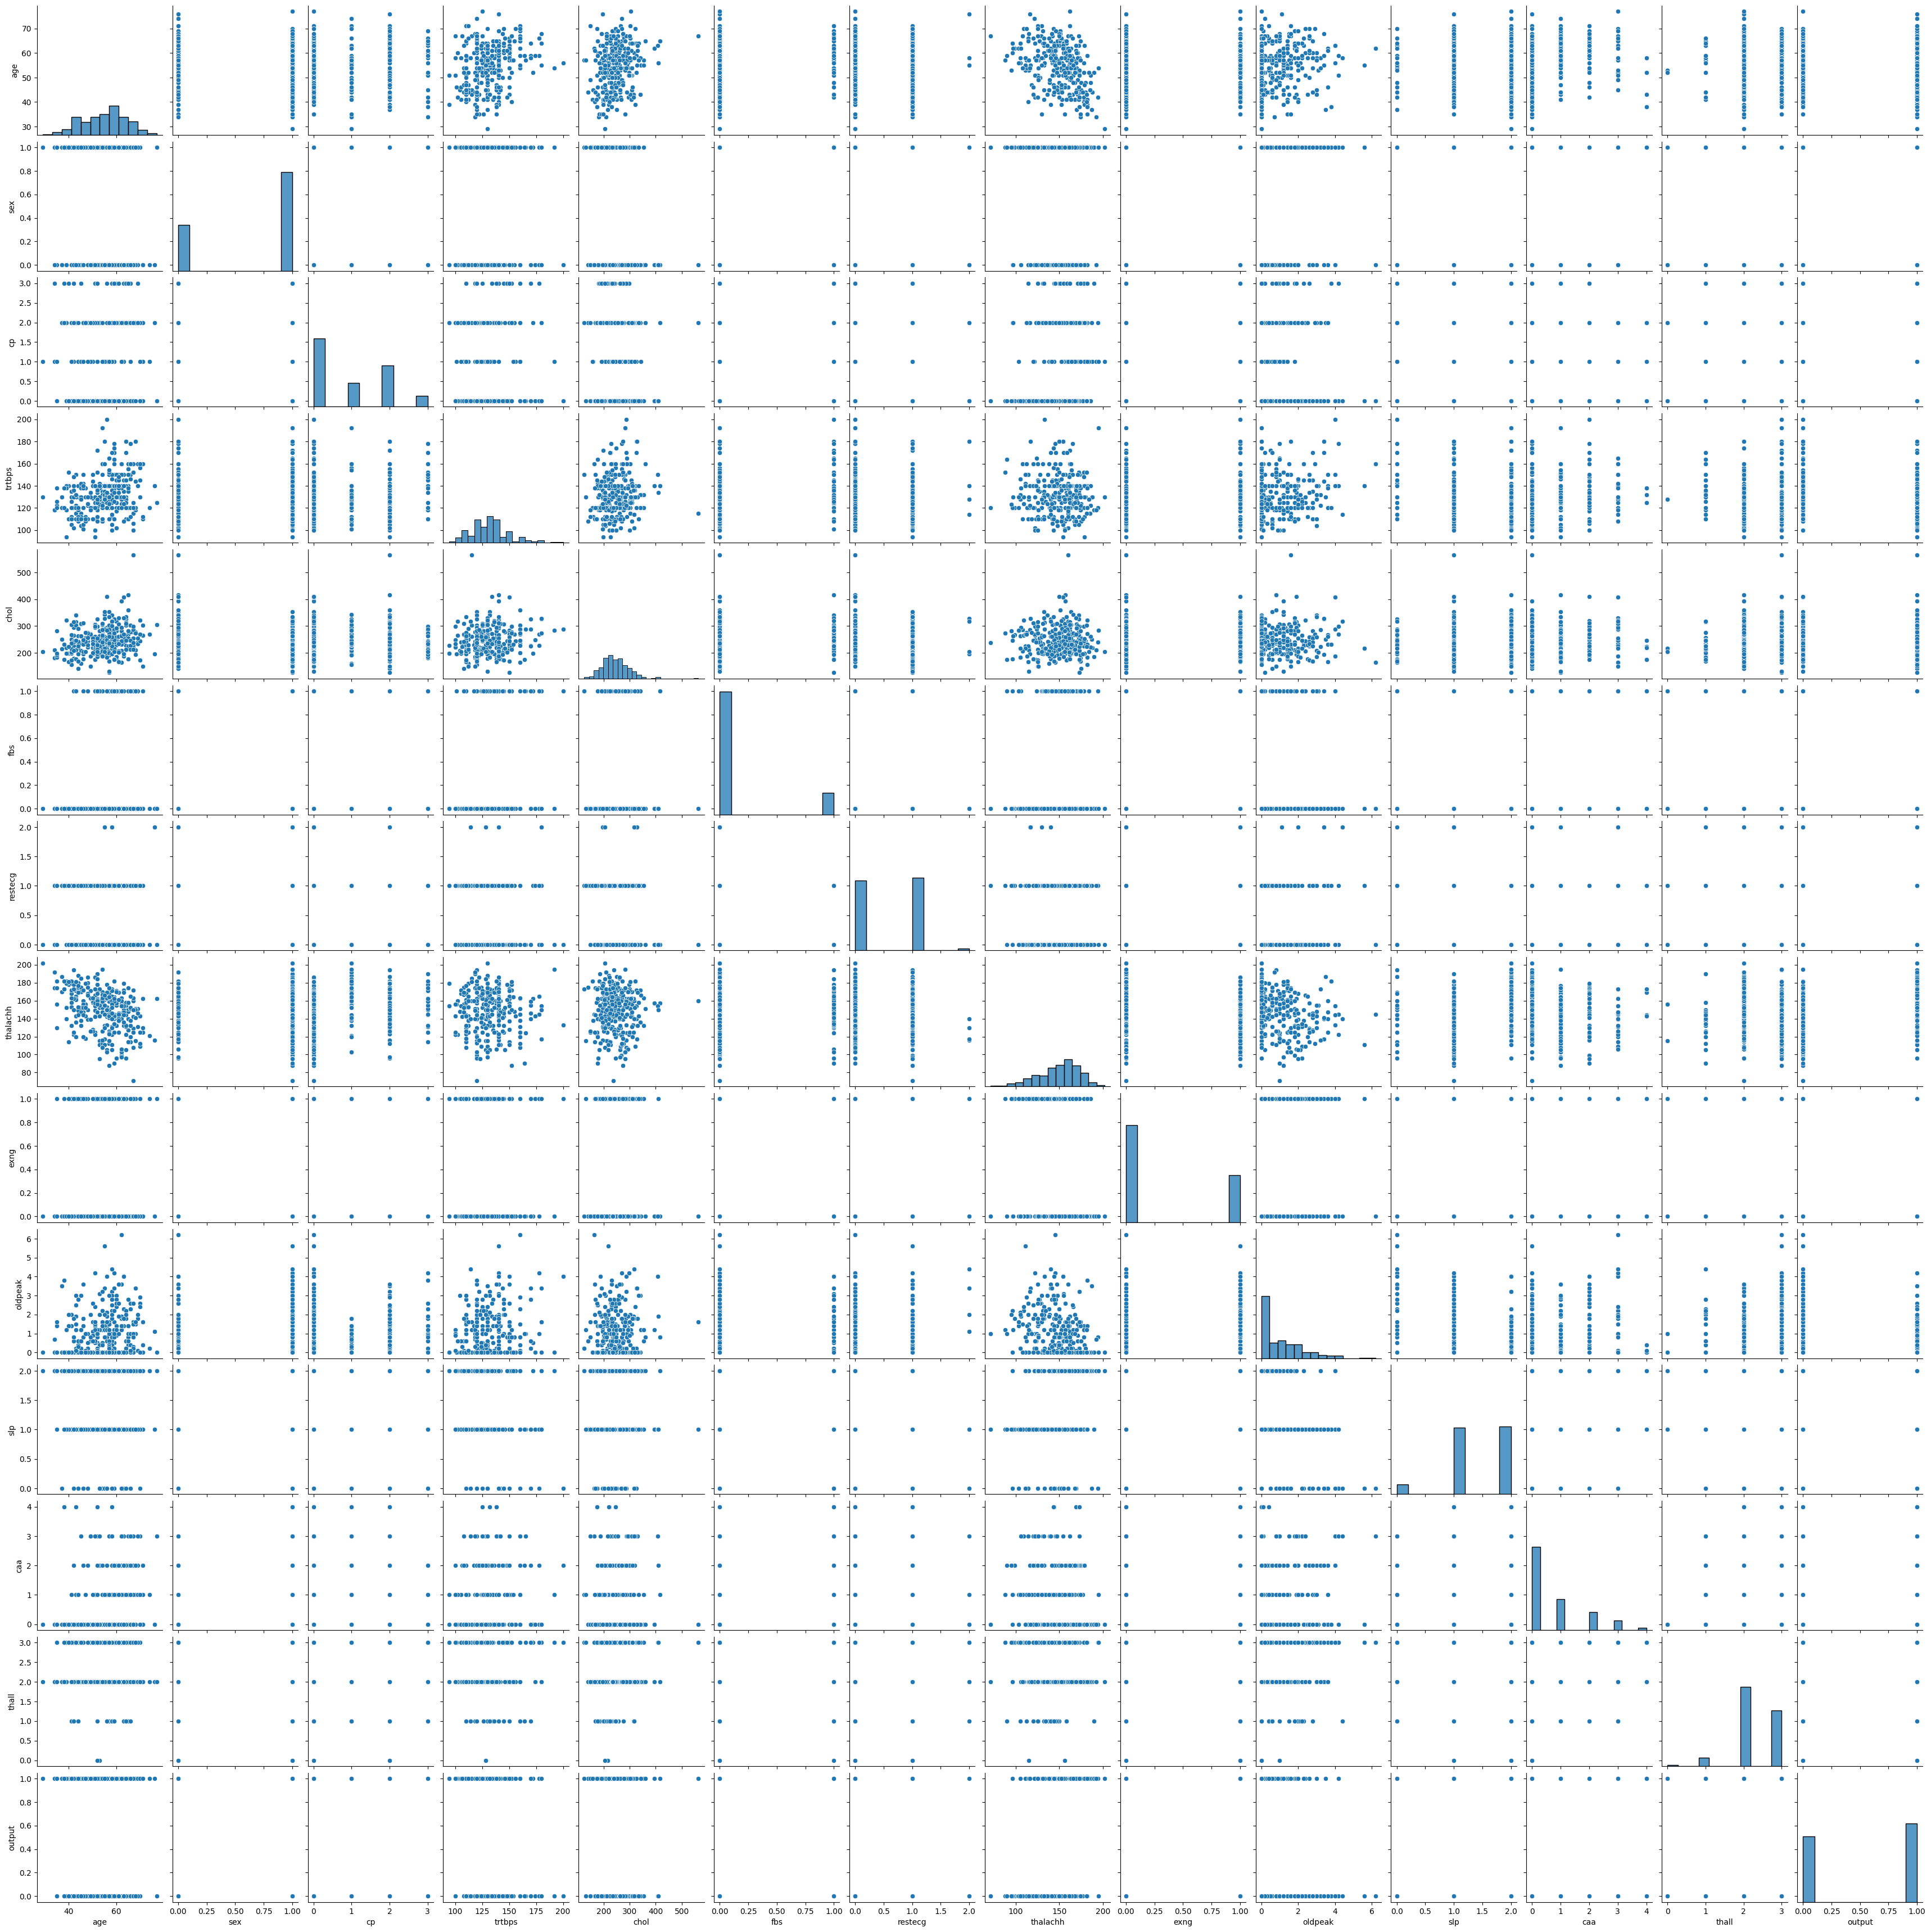

In [14]:
# Plot pairplot
sns.pairplot(df,hue="output")

According to the heatmap and pairplot there are no high correlation between features.

In [104]:
# Split Data
X = df.drop('output', axis=1)
y = df['output']

In [105]:
# Define train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Scalling Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

![Modeling](https://cityupload.io/2024/09/5-modeling.png)

## Modeling

### Logistic Regression model

In [107]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Create a pipeline to apply PolynomialFeatures and LogisticRegression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Placeholder for PolynomialFeatures
    ('scaler', StandardScaler()),  # Standardize features
    ('log_reg', LogisticRegression())  # Apply Logistic Regression
])

# Set up a parameter grid to tune the model
param_grid = {
    'poly__degree': [1, 2, 3],  # Tuning polynomial degrees
    'log_reg__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'log_reg__C': [0.01, 0.1, 1, 10, 100],
    'log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'log_reg__max_iter': [100, 200, 500]
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Evaluate the model on the test set
best_log_reg = grid_search.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test_scaled)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Calculate and print the recall score, and save it in a variable
log_reg_recall = recall_score(y_test, y_pred_log_reg)
print(f"log_reg Recall: {log_reg_recall:.4f}")

Best Parameters: {'log_reg__C': 0.01, 'log_reg__max_iter': 100, 'log_reg__penalty': 'l2', 'log_reg__solver': 'liblinear', 'poly__degree': 1}
Best Accuracy Score: 0.8263605442176871
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

log_reg Recall: 0.9062


The most important factor for me is the Recall, as False Negative is the more critical in our case of heart attack.

### SVM model

In [31]:
# Create a pipeline to apply PolynomialFeatures and SVC
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Placeholder for PolynomialFeatures
    ('svc', SVC())  # Apply Support Vector Classification
])

# Set up a parameter grid to tune the model
param_grid = {
    'poly__degree': [1, 2, 3],  # Tuning polynomial degrees
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Different kernels
    'svc__C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'svc__gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Evaluate the model on the test set
best_svm = grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Calculate and print the recall score, and save it in a variable named svm_recall
svm_recall = recall_score(y_test, y_pred_svm)
print(f"SVM Recall: {svm_recall:.4f}")

Best Parameters: {'poly__degree': 3, 'svc__C': 1, 'svc__gamma': 'auto', 'svc__kernel': 'sigmoid'}
Best Accuracy Score: 0.8224489795918368
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

SVM_Recall: 0.8438


### KNN model

In [32]:
# Create a pipeline to apply PolynomialFeatures and KNeighborsClassifier
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Placeholder for PolynomialFeatures
    ('scaler', StandardScaler()),  # Standardize features
    ('knn', KNeighborsClassifier())  # Apply K-Nearest Neighbors Classification
])

# Set up a parameter grid to tune the model
param_grid = {
    'poly__degree': [1, 2, 3],  # Tuning polynomial degrees
    'knn__n_neighbors': [3, 5, 7, 10],  # Number of neighbors
    'knn__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm to compute nearest neighbors
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Evaluate the model on the test set
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Calculate and print the recall score, and save it in a variable named knn_recall
knn_recall = recall_score(y_test, y_pred_knn)
print(f"KNN Recall: {knn_recall:.4f}")

Best Parameters: {'knn__algorithm': 'auto', 'knn__n_neighbors': 5, 'knn__weights': 'uniform', 'poly__degree': 1}
Best Accuracy Score: 0.8141156462585034
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

KNN Recall: 0.8750


### Decision Tree model

In [33]:
# Create a pipeline to apply PolynomialFeatures and DecisionTreeClassifier
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Placeholder for PolynomialFeatures
    ('scaler', StandardScaler()),  # Standardize features
    ('dt', DecisionTreeClassifier())  # Apply Decision Tree Classification
])

# Set up a parameter grid to tune the model
param_grid = {
    'poly__degree': [1, 2, 3],  # Tuning polynomial degrees
    'dt__criterion': ['gini', 'entropy'],  # Criterion for splitting
    'dt__max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'dt__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'dt__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Evaluate the model on the test set
best_dt = grid_search.best_estimator_
y_pred_dt = best_dt.predict(X_test_scaled)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Calculate and print the recall score, and save it in a variable named dt_recall
dt_recall = recall_score(y_test, y_pred_dt)
print(f"Decision Tree Recall: {dt_recall:.4f}")


Best Parameters: {'dt__criterion': 'gini', 'dt__max_depth': 20, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 5, 'poly__degree': 3}
Best Accuracy Score: 0.7767006802721088
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Decision Tree Recall: 0.7812


The Decision tree model results is the worse till now.

### RandomForest model

In [34]:
# Create a pipeline to apply PolynomialFeatures and RandomForestClassifier
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Placeholder for PolynomialFeatures
    ('scaler', StandardScaler()),  # Standardize features
    ('rf', RandomForestClassifier())  # Apply Random Forest Classification
])

# Set up a parameter grid to tune the model
param_grid = {
    'poly__degree': [1, 2, 3],  # Tuning polynomial degrees
    'rf__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'rf__criterion': ['gini', 'entropy'],  # Criterion for splitting
    'rf__max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'rf__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'rf__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Evaluate the model on the test set
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Calculate and print the recall score, and save it in a variable named rf_recall
rf_recall = recall_score(y_test, y_pred_rf)
print(f"Random Forest Recall: {rf_recall:.4f}")

Best Parameters: {'poly__degree': 1, 'rf__criterion': 'gini', 'rf__max_depth': None, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 5, 'rf__n_estimators': 50}
Best Accuracy Score: 0.8386904761904761
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Random Forest Recall: 0.9062


**RandomForest model took vert long time and gave results almost the same as logistic regression**

### XGBoost model

In [41]:
# Create a pipeline to apply PolynomialFeatures and XGBClassifier
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Placeholder for PolynomialFeatures
    ('scaler', StandardScaler()),  # Standardize features
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))  # Apply XGBoost Classification
])

# Set up a parameter grid to tune the model
param_grid = {
    'poly__degree': [1, 2, 3],  # Tuning polynomial degrees
    'xgb__n_estimators': [50, 100, 200],  # Number of boosting rounds
    'xgb__max_depth': [3, 5, 7],  # Maximum depth of the tree
    'xgb__learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'xgb__subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees
    'xgb__colsample_bytree': [0.8, 0.9, 1.0]  # Fraction of features used for each tree
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Evaluate the model on the test set
best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Calculate and print the recall score, and save it in a variable named xgb_recall
xgb_recall = recall_score(y_test, y_pred_xgb)
print(f"XGBoost Recall: {xgb_recall:.4f}")


Best Parameters: {'poly__degree': 3, 'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 1.0}
Best Accuracy Score: 0.8307823129251701
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

XGBoost Recall: 0.7812


Not good results compared to other models. Also, took very long time

### AUC for models

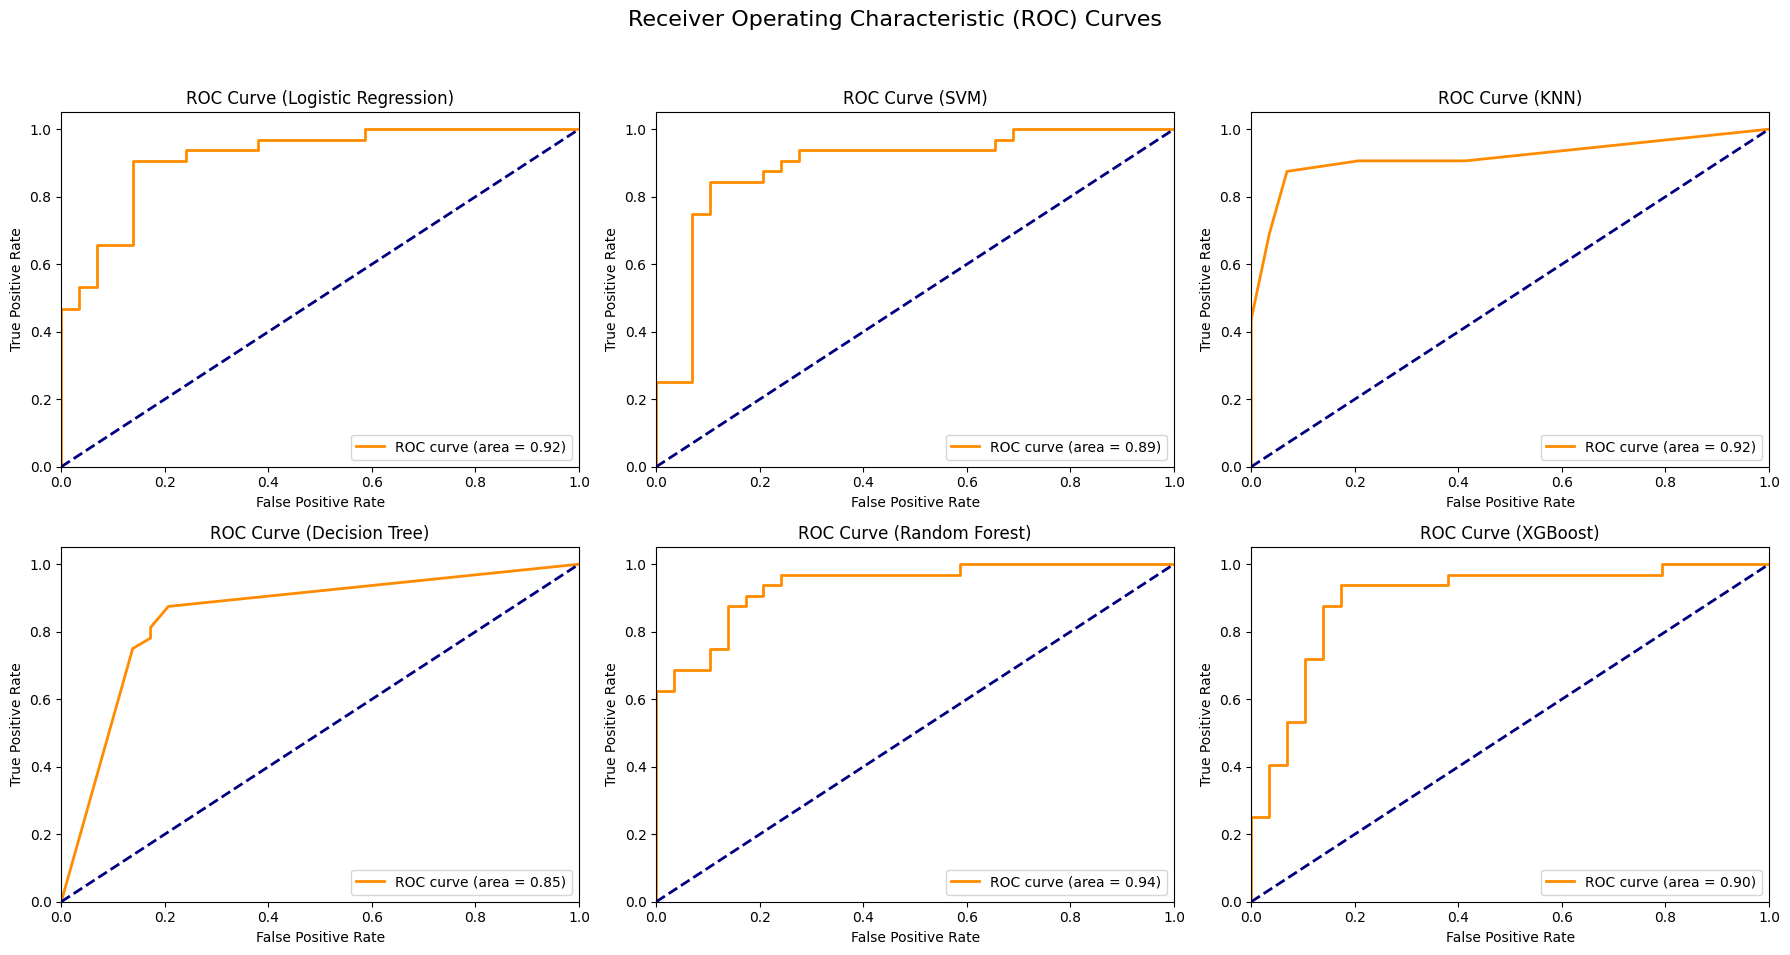

In [48]:
# Function to plot ROC curve
def plot_roc_curve(ax, y_test, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve ({model_name})')
    ax.legend(loc='lower right')

# Create a figure with subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))  # Adjust the size as needed
fig.suptitle('Receiver Operating Characteristic (ROC) Curves', fontsize=16)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Example for Logistic Regression
log_reg_proba = best_log_reg.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(axs[0], y_test, log_reg_proba, 'Logistic Regression')

# Example for SVM
svm_proba = best_svm.decision_function(X_test_scaled)
plot_roc_curve(axs[1], y_test, svm_proba, 'SVM')

# Example for KNN
knn_proba = best_knn.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(axs[2], y_test, knn_proba, 'KNN')

# Example for Decision Tree
dt_proba = best_dt.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(axs[3], y_test, dt_proba, 'Decision Tree')

# Example for Random Forest
rf_proba = best_rf.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(axs[4], y_test, rf_proba, 'Random Forest')

# Example for XGBoost
xgb_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(axs[5], y_test, xgb_proba, 'XGBoost')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [115]:
from sklearn.metrics import roc_auc_score

# Initialize a dictionary to store metrics
metrics = {
    'Model': [],
    'Recall': [],
    'AUC': []
}

# Calculate and store recall and AUC for Logistic Regression
log_reg_proba = best_log_reg.predict_proba(X_test_scaled)[:, 1]
log_reg_recall = recall_score(y_test, best_log_reg.predict(X_test_scaled))
log_reg_auc = roc_auc_score(y_test, log_reg_proba)
metrics['Model'].append('Logistic Regression')
metrics['Recall'].append(log_reg_recall)
metrics['AUC'].append(log_reg_auc)

# Calculate and store recall and AUC for SVM
svm_proba = best_svc.decision_function(X_test_scaled)
svm_recall = recall_score(y_test, best_svc.predict(X_test_scaled))
svm_auc = roc_auc_score(y_test, svm_proba)
metrics['Model'].append('SVM')
metrics['Recall'].append(svm_recall)
metrics['AUC'].append(svm_auc)

# Calculate and store recall and AUC for KNN
knn_proba = best_knn.predict_proba(X_test_scaled)[:, 1]
knn_recall = recall_score(y_test, best_knn.predict(X_test_scaled))
knn_auc = roc_auc_score(y_test, knn_proba)
metrics['Model'].append('KNN')
metrics['Recall'].append(knn_recall)
metrics['AUC'].append(knn_auc)

# Calculate and store recall and AUC for Decision Tree
dt_proba = best_dt.predict_proba(X_test_scaled)[:, 1]
dt_recall = recall_score(y_test, best_dt.predict(X_test_scaled))
dt_auc = roc_auc_score(y_test, dt_proba)
metrics['Model'].append('Decision Tree')
metrics['Recall'].append(dt_recall)
metrics['AUC'].append(dt_auc)

# Calculate and store recall and AUC for Random Forest
rf_proba = best_rf.predict_proba(X_test_scaled)[:, 1]
rf_recall = recall_score(y_test, best_rf.predict(X_test_scaled))
rf_auc = roc_auc_score(y_test, rf_proba)
metrics['Model'].append('Random Forest')
metrics['Recall'].append(rf_recall)
metrics['AUC'].append(rf_auc)

# Calculate and store recall and AUC for XGBoost
xgb_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]
xgb_recall = recall_score(y_test, best_xgb.predict(X_test_scaled))
xgb_auc = roc_auc_score(y_test, xgb_proba)
metrics['Model'].append('XGBoost')
metrics['Recall'].append(xgb_recall)
metrics['AUC'].append(xgb_auc)

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
metrics_df.set_index('Model', inplace=True)
metrics_df

,Recall,AUC
Model,,
Logistic Regression,0.90625,0.917026
SVM,0.84375,0.891164
KNN,0.87500,0.915409
Decision Tree,0.78125,0.850754
Random Forest,0.90625,0.936422
XGBoost,0.78125,0.897629


**From the previous AUC and Recall, it seema that Logistic regression model is the best one, even with RandomForest with near results but logistic regression model took shorter time that randomforest**

**Next i'll try to test more factors to enhance the model, such as k fold crossvalidation.**

## Log_reg model with K fold

In [54]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline


# Define a range of k values to test
k_values = [5, 10, 15, 20]
best_k = None
best_recall_mean = 0
best_auc_mean = 0

# Store the best parameters including k
best_parameters = {'k': None, 'recall_mean': None, 'auc_mean': None}

# Iterate over different values of k
for k in k_values:
    # Initialize K-Fold Cross-Validation with current k
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Lists to store recall and AUC scores for the current k
    recall_scores = []
    auc_scores = []

    # Create a pipeline with scaling and Logistic Regression
    pipeline = Pipeline([
        ('log_reg', best_log_reg)  # Logistic Regression with best parameters
    ])

    # Perform K-Fold Cross-Validation
    for train_index, test_index in kf.split(X_train_scaled):
        X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        # Fit the model
        pipeline.fit(X_train_fold, y_train_fold)

        # Predict probabilities and classes
        y_proba = pipeline.predict_proba(X_test_fold)[:, 1]
        y_pred = pipeline.predict(X_test_fold)

        # Calculate recall and AUC for the current fold
        recall = recall_score(y_test_fold, y_pred)
        fpr, tpr, _ = roc_curve(y_test_fold, y_proba)
        fold_auc = auc(fpr, tpr)

        # Append the results to the lists
        recall_scores.append(recall)
        auc_scores.append(fold_auc)

    # Calculate mean recall and AUC for the current k
    recall_mean = np.mean(recall_scores)
    auc_mean = np.mean(auc_scores)

    # Update best k if current k performs better
    if recall_mean > best_recall_mean and auc_mean > best_auc_mean:
        best_k = k
        best_recall_mean = recall_mean
        best_auc_mean = auc_mean
        best_parameters['k'] = best_k
        best_parameters['recall_mean'] = best_recall_mean
        best_parameters['auc_mean'] = best_auc_mean

# Print the best k and associated metrics
print(f'Best number of folds (k): {best_parameters["k"]}')
print(f'Mean Recall for best k: {best_parameters["recall_mean"]:.4f}')
print(f'Mean AUC for best k: {best_parameters["auc_mean"]:.4f}')

# Save the best k value for later use
# You can use best_parameters['k'] to perform final cross-validation or other tasks


Best number of folds (k): 5
Mean Recall for best k: 0.9334
Mean AUC for best k: 0.4815


**Despite of reducing AUC value, but i gets higher value for Recall which is the most important factor for me. So, it's better than logistic regression without k fold crossvalidation.**

![profiling](https://cityupload.io/2024/09/8-profiling.png)

## Data Profiling

Here i will try exploring important features that affects the classification. I'll use built in function for RandomForest model

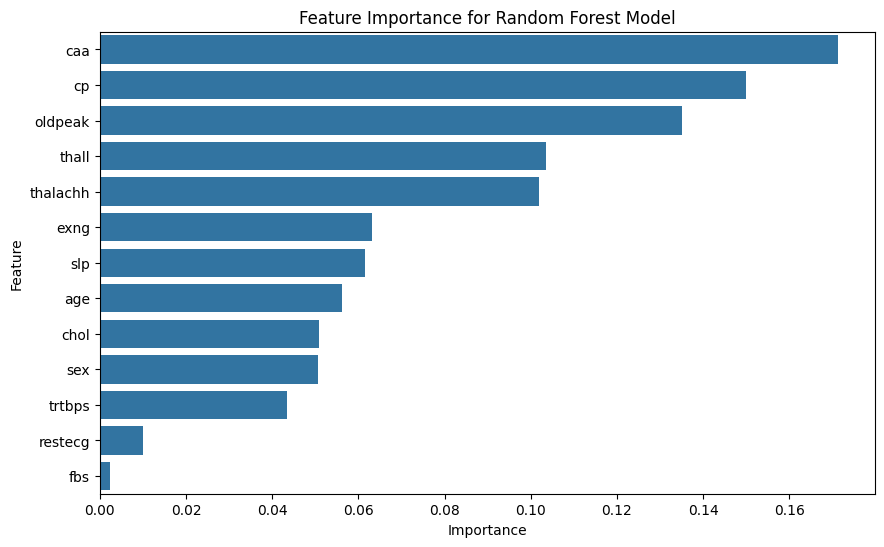

In [124]:
# Extract the RandomForest model from the pipeline
rf_model = best_rf.named_steps['rf']  # Use the name of the step in your pipeline

# Get feature importances from the RandomForest model
importances = rf_model.feature_importances_[1:]

# Assuming your training data's features have the same order as when training the model
feature_names = X.columns  # Use actual column names of your dataset

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


This shows that caa is the most important one, while the rest are in two groups with near importance and the least imortant one is fbs.

![Conclusion](https://cityupload.io/2024/09/9-conclusion.png)

## Conclusion

In this project, i developed a machine learning model to predict heart attacks using various classification algorithms. After preprocessing the data, i tested models like Logistic Regression, SVM, KNN, Decision Trees, Random Forest, and XGBoost. Through hyperparameter tuning and cross-validation, Logistic Regression emerged as the best model. I fine-tuned it using the best parameters and optimal k for cross-validation, achieving strong performance for recall , providing a reliable model for heart attack prediction.